# **Задание**

Выберите временной ряд.

Постройте его модель ARIMA.

Оформите отчёт в Jupyter-ноутбук.

**Дополнительное задание**

Попробуйте спрогнозировать график классическим ML.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

# **Исследуемый временной ряд - значения среднемесячной температуры ("mean-monthly-air-temperature").**

In [2]:
series = pd.read_csv("mean-monthly-air-temperature-deg.csv")['Deg']

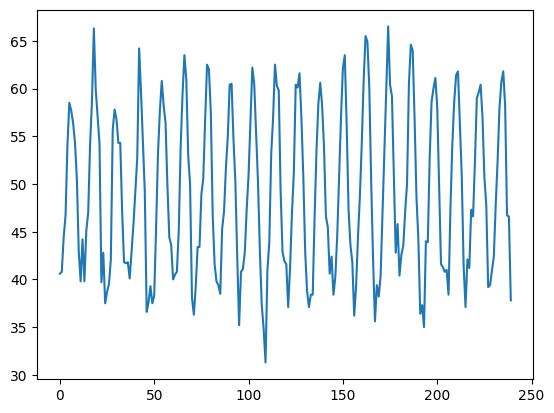

In [ ]:
plt.plot(series)

Функции для подбора оптимальных параметров (p, d, q) ARIMA-модели методом поиска по сетке (Grid Search):

In [ ]:
def evaluate_arima_model(X, arima_order):
  # Разделение ряда на обучающую (60%) и тестовую (40%) части:
  train_size = int(len(X) * 0.6)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # Список с предсказанными значениями:
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
    # Подсчет ошибки RMSE:
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

# Оценка оптимальной комбинации параметров p, d, q:
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
            print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
series = pd.read_csv('mean-monthly-air-temperature-deg.csv', header=0, index_col=0, parse_dates=True) #, squeeze=True)
# Диапазоны значений параметров для перебора:
p_values = [0, 1, 3, 12]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=8.877
ARIMA(0, 0, 1) RMSE=5.919
ARIMA(0, 1, 0) RMSE=5.335
ARIMA(0, 1, 1) RMSE=4.917
ARIMA(1, 0, 1) RMSE=4.632
ARIMA(3, 0, 0) RMSE=3.245
ARIMA(3, 0, 1) RMSE=2.920
ARIMA(12, 0, 0) RMSE=2.560
ARIMA(12, 0, 1) RMSE=2.539
ARIMA(12, 1, 0) RMSE=2.498
ARIMA(12, 1, 1) RMSE=2.493
Best ARIMA(12, 1, 1) RMSE=2.493


Обучение модели с полученными выше оптимальными значениями параметров:

In [40]:
model = ARIMA(series, order=(12,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
model_fit.resid

0      40.600000
1       0.199491
2       3.508591
3       0.845156
4       5.571190
         ...    
235     1.654754
236     0.685960
237    -5.906985
238     3.008038
239    -3.512549
Length: 240, dtype: float64

Графики исходного временного ряда и предсказанного:

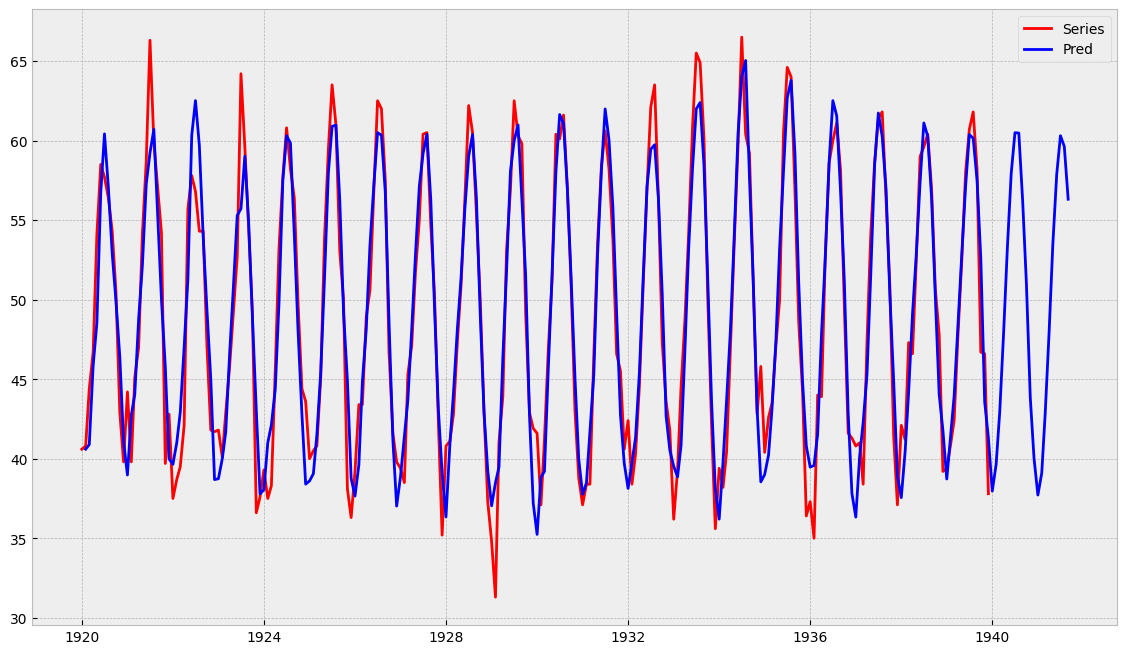

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    pred = model_fit.predict(1, len(series)+20, ax=ax)
    plt.plot(series, color='red', label='Series')
    plt.plot(pred, color='blue', label='Pred')
    plt.legend()
    plt.show()